<a href="https://www.kaggle.com/code/ayushashtikar/videogames?scriptVersionId=118021501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Video Games Analysis

![Games](https://img.freepik.com/free-vector/skull-gaming-with-joy-stick-emblem-modern-style_32991-492.jpg?w=740&t=st=1675078328~exp=1675078928~hmac=4b8eac77175d91989bebf6caa93517165985f15d1cc30155d4a1ec1aa60018ce)

Video games are a form of entertainment that offer players an engaging experience and can have several benefits. They can help players improve hand-eye coordination and problem-solving skills, and provide a sense of escapism. In addition, playing video games with others can also enhance social skills and teamwork. It is recommended to enjoy video games in moderation to maximize their benefits while minimizing any potential negative effects.

In this Notebook we going to analyze and visualize following topics.  
* Most famous game Genres
* Top 20 Game Publisher
* Game Published Each Year
* Top 20 Most Sold Games
* Which is Most Published Genre in Top 100 Most Sold Games
* Platform with most games released


In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#setting style
sns.set_theme(style='whitegrid',palette="rocket")

### Reading Data

In [2]:
#reading and checking data
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
df.tail(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


### Getting dtypes and null values

In [3]:
#checking data types and null values null values
df.info()
print("\n\nNull Values")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Null Values


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
#dealing with null values
df['Publisher'].replace(np.nan, 'No_Data', inplace=True)

#for now will represent missing values with 0
df['Year'].replace(np.nan, 0 , inplace=True)
df['Year'] = df['Year'].astype(int)

# **Most famous game Genres**

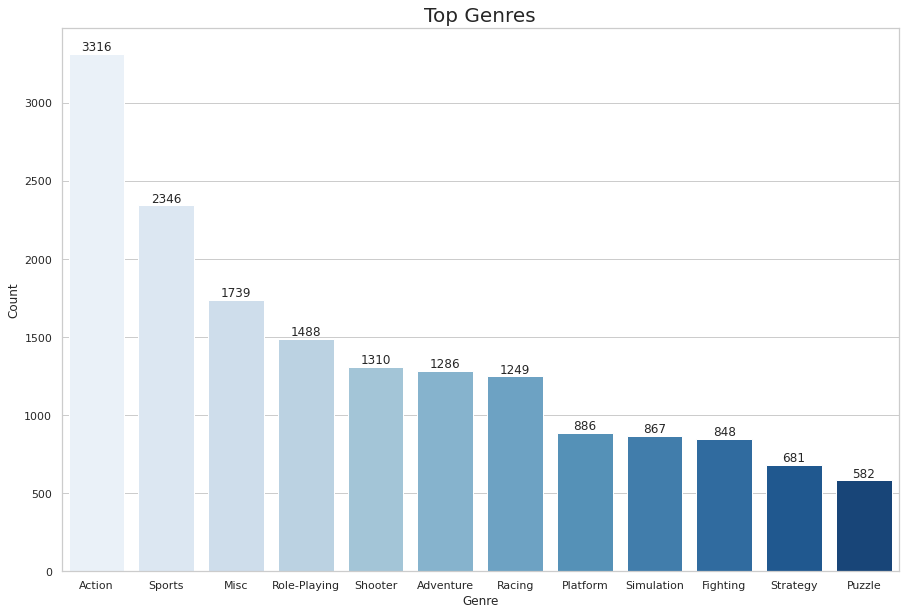

In [5]:
#plotting top Genres
#counting values
game = df['Genre'].value_counts().rename_axis('Genre').reset_index(name='Count')

#plotting
plt.figure(figsize=(15,10))
ax = sns.barplot(x=game['Genre'], 
                 y=game['Count'],
                 data=game,
                 palette="Blues")


for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Top Genres", fontsize=20)
plt.show()


The most famouse Genre is ***Action*** with 3316 games in total   
followed by ***Sports*** and ***Misc***

# **Top 20 Game Publisher**

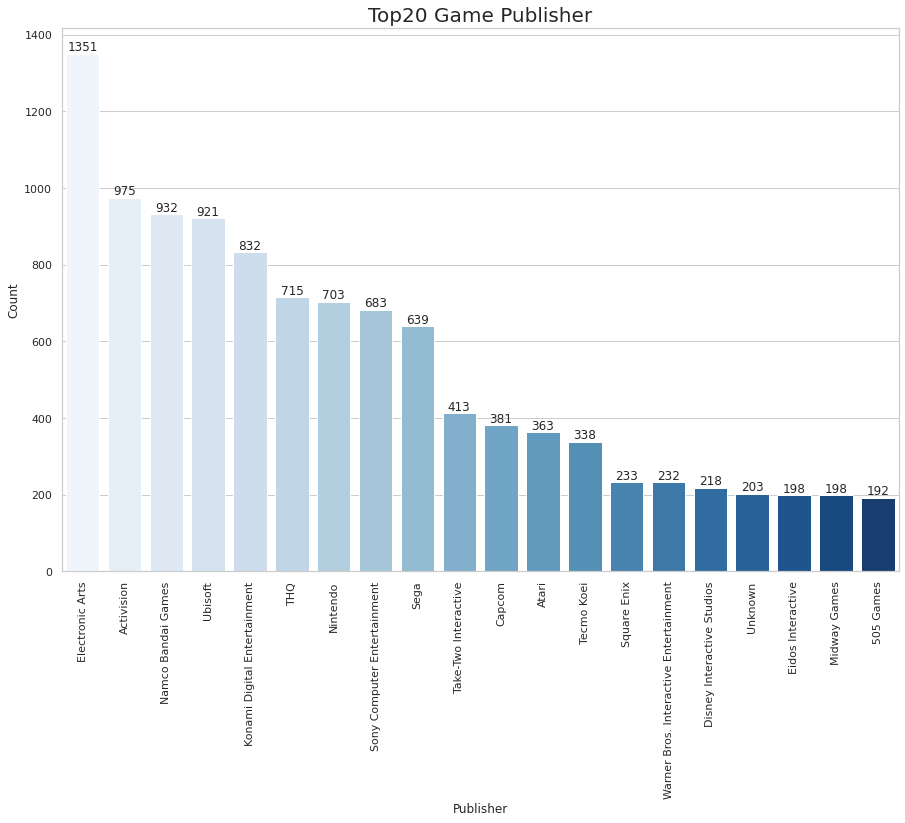

In [6]:
#plotting top10 Publisher
#counting values and making dataframe out of it
pub = df['Publisher'].value_counts().rename_axis('Publisher').reset_index(name="Count")
pub1 = pub.head(20).copy()

#plotting
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Publisher', 
                 y='Count',
                 data=pub1,
                 palette="Blues")

for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=90)

plt.title("Top20 Game Publisher", fontsize=20)
plt.show()


***EA*** leads the industry with most ammout of games published (1355 total),   
followed by ***Activision*** with 975 games published total.   
***Namco Bandal Games*** and ***Ubisoft*** takes third and forth position with 932 and 921 games

# **Game Published Each Year**

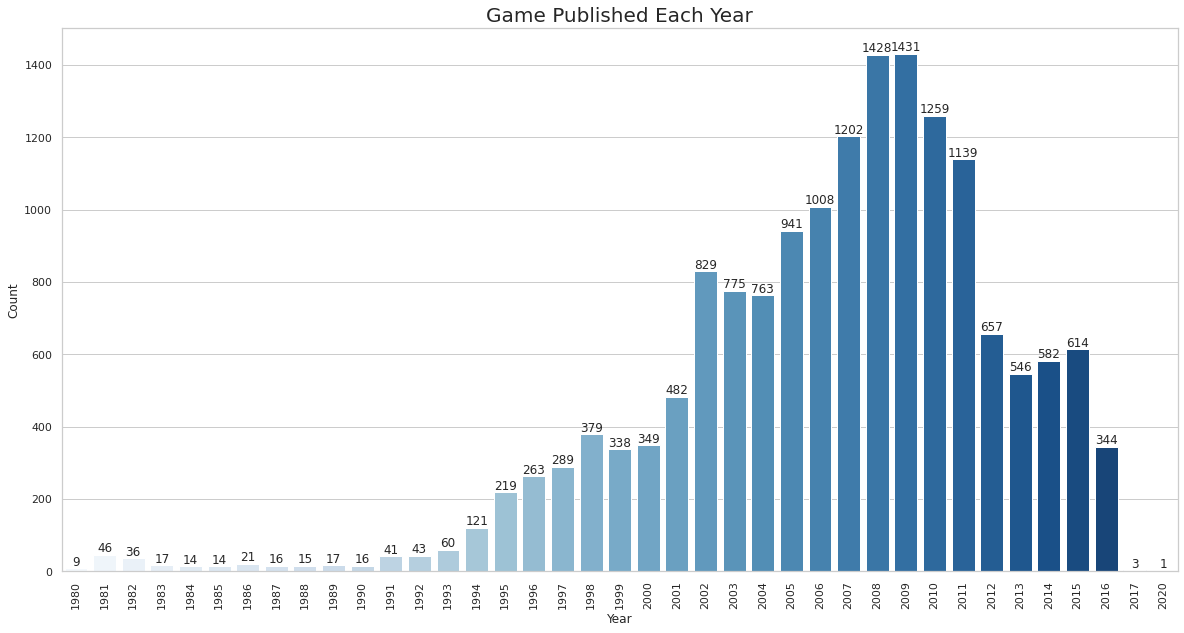

In [7]:
#counting values for year and plotting
yea = df['Year'].value_counts(ascending=False).rename_axis('Year').sort_index().reset_index(name="Count")
#droping first row because it represents missing values
year = yea.iloc[1:]
#aternative way
#df.drop(index=df.index[0], axis=0, inplace=True)

#plotting games published per year
plt.figure(figsize=(20,10))
ax = sns.barplot(data=year,
                 x='Year',
                 y="Count",
                 palette="Blues",)

plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)

plt.title("Game Published Each Year", fontsize=20)
plt.show()
    

**2009** and **2008** were the Golden Era with most amount of games published,  
1431 and 1428 game published these two years was on the peak of game production.  
After that we see a downwards trend from 2010 to 2016 as nubers keep falling.

# **Top 20 Most Sold Games**

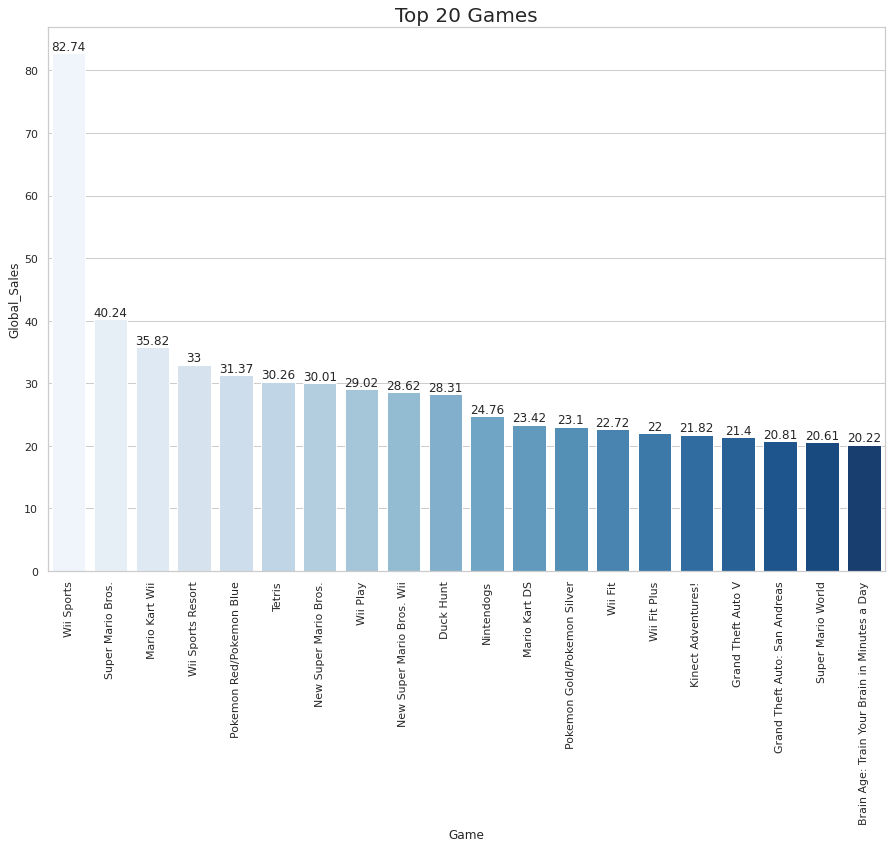

In [8]:
#plotting top 10 games
sales = df.sort_values(by='Global_Sales', ascending=False).copy()
sales20 = sales.head(20).copy()
sales100 = sales.head(100).copy()

plt.figure(figsize=(15,10))

ax = sns.barplot(x=sales20['Name'],
            y=sales20['Global_Sales'],
            palette="Blues")
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation=90)
plt.xlabel('Game')
plt.title("Top 20 Games", fontsize=20)
plt.show()

The most famous game is **Wii Sports** with 82.74 Million sales  
followed by **Super Mario Bros** and **Mario Kart Wii**

# **Which is Most Published Genre in Top 100 Most Sold Games**

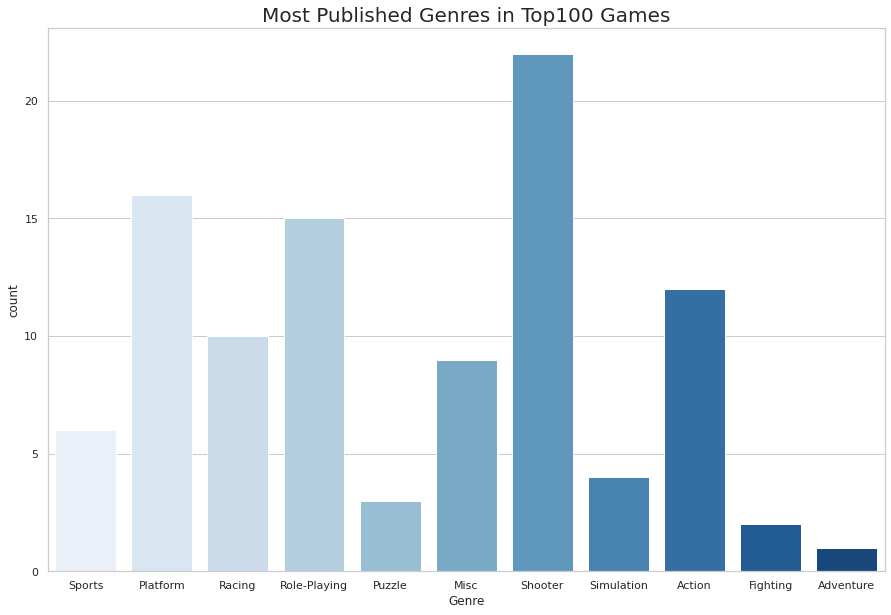

In [9]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Genre',
                   data=sales100, 
                   palette="Blues")

# ax.legend(bbox_to_anchor= (1,1))
plt.title('Most Published Genres in Top100 Games', fontsize=20)
plt.show()

**Shooter** is the most popular genre in top 100 most sold games.

# **Platform with most games released**

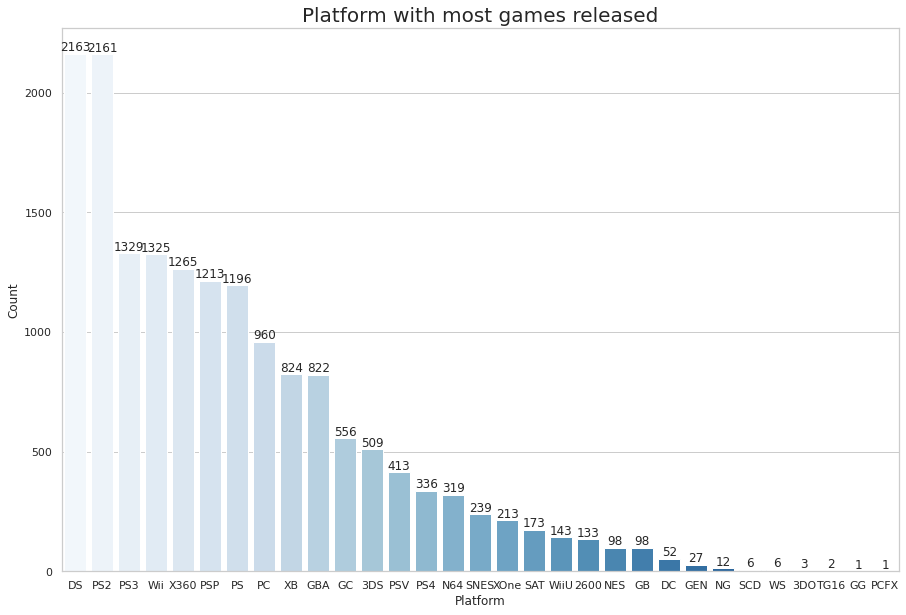

In [10]:
platform = df['Platform'].value_counts().rename_axis('Platform').reset_index(name="Count")

plt.figure(figsize=(15,10))
ax = sns.barplot(x='Platform',
                 y='Count',
                 data=platform,
                 palette="Blues")

for i in ax.containers:
    ax.bar_label(i)

plt.title("Platform with most games released", fontsize=20)
plt.show()
    

**Nintendo DS** is the Platform with most ammount of games released, followe by **PS2** and **PS3**.

It was the short analysis on video games sales,  
please give me feedback in discussion section,  
and if you find this insightful +1 would be great.  